# Description

This Jupyter Notebook contains an implementation of the BIRCH clustering algorithm with and without adaptive thresholding. The notebook demonstrates how adaptive thresholding allows the algorithm to run within the limits of memory by adjusting the threshold on the fly. The notebook also includes visualizations of the clustering results and the threshold adjustments over time.

# BIRCH without adaptive thresholding

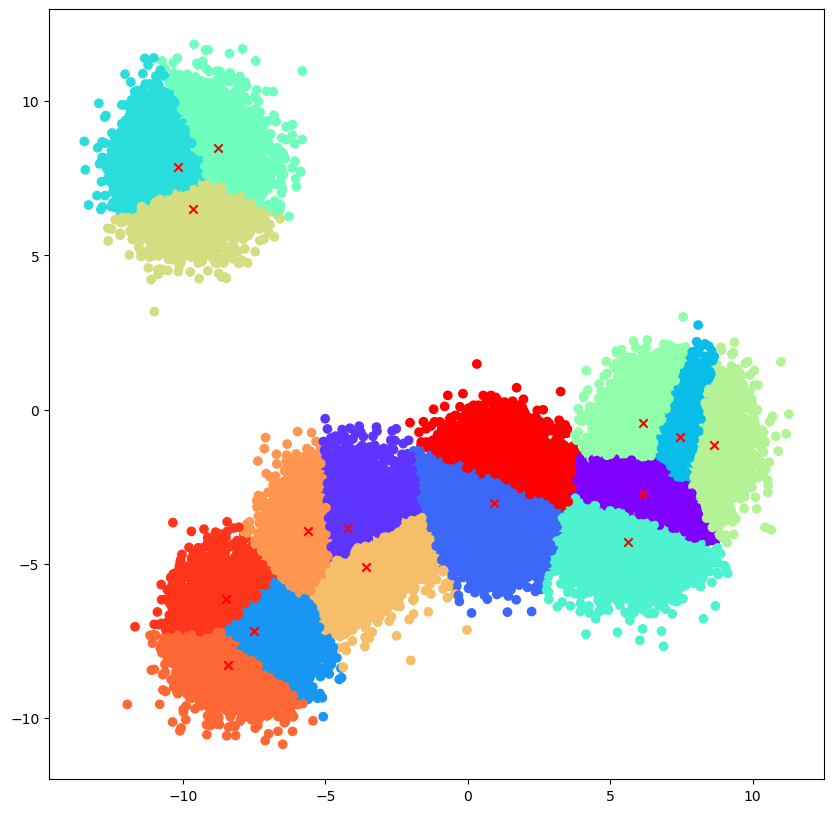

In [10]:
from sklearn.datasets import make_blobs
from Custom_BIRCH import BIRCH
import matplotlib.pyplot as plt
import numpy as np

dataset, blob_clusters = make_blobs(n_samples = 100000, n_features=2, centers=6, random_state = 48)

branching_factor = 50
threshold = 2

birch = BIRCH(branching_factor=branching_factor, threshold=threshold)
birch.fit(dataset)

clusters = birch.get_clusters()
labels = birch.predict(dataset)

custom_birch_centroids = [np.mean(np.array(cf.data_points), axis=0) for cf in clusters]
custom_birch_centroids = np.array(custom_birch_centroids)

plt.figure(figsize=(10, 10))
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='rainbow')
plt.scatter(custom_birch_centroids[:, 0], custom_birch_centroids[:, 1], c='red', marker='x') 
plt.show()



# BIRCH with adaptive thresholding

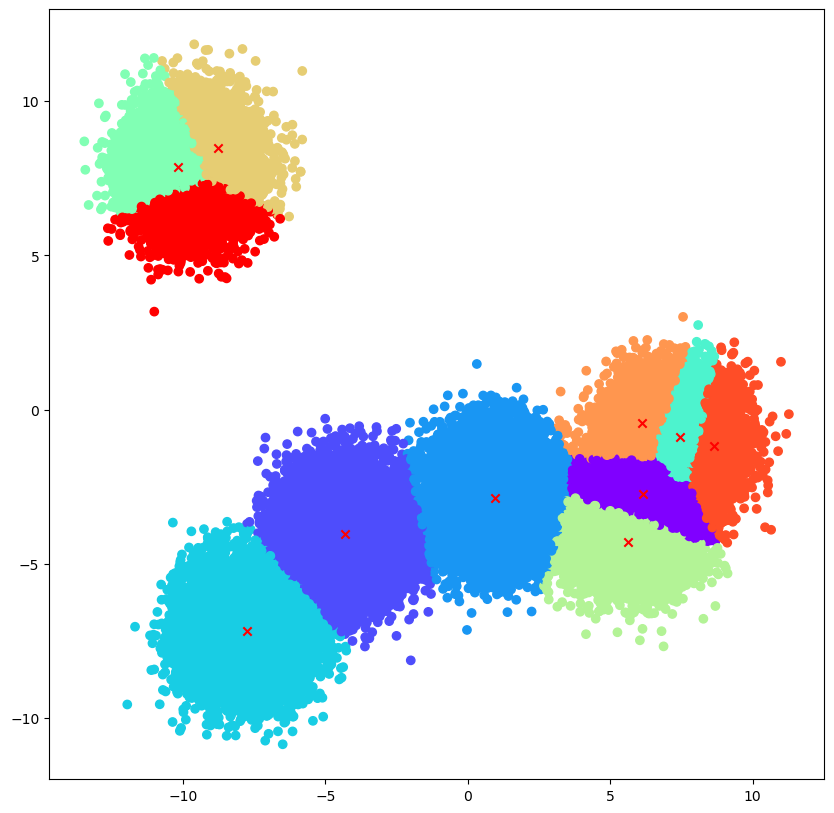

In [11]:
max_memory = 0.5 #MB

birch = BIRCH(branching_factor=branching_factor, threshold=threshold, max_memory_limit=max_memory)
birch.fit(dataset)

clusters = birch.get_clusters()
labels = birch.predict(dataset)

custom_birch_centroids = [np.mean(np.array(cf.data_points), axis=0) for cf in clusters]
custom_birch_centroids = np.array(custom_birch_centroids)

plt.figure(figsize=(10, 10))
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='rainbow')
plt.scatter(custom_birch_centroids[:, 0], custom_birch_centroids[:, 1], c='red', marker='x') 
plt.show()

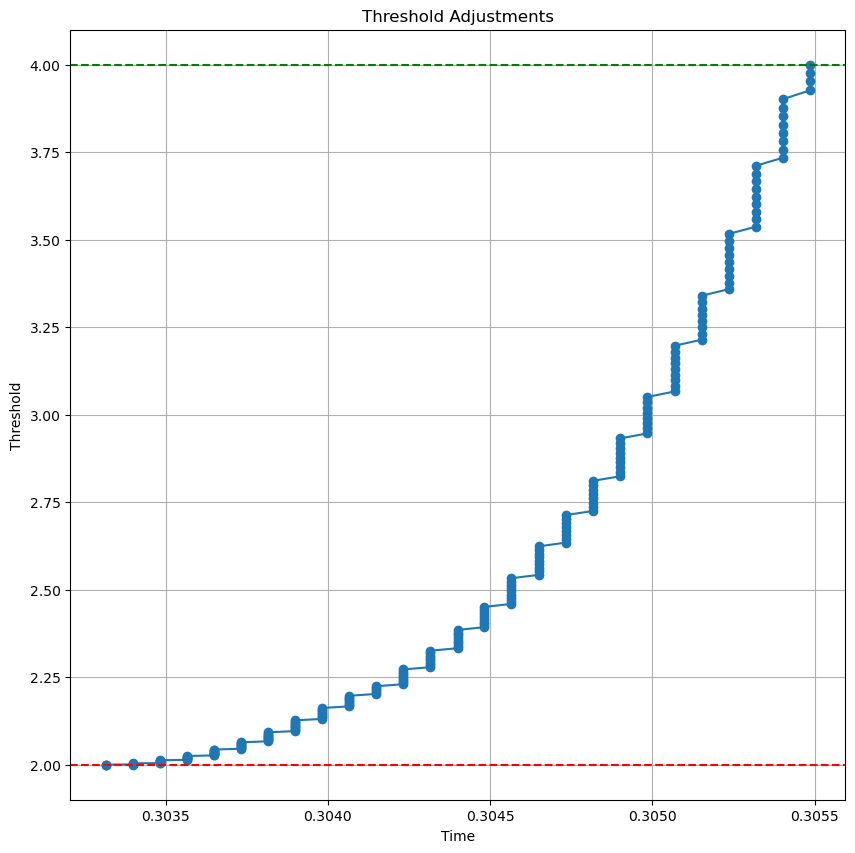

In [13]:
adjustment_times, thresholds = zip(*birch.threshold_adjustments)
relative_times_fraction = [t / birch.total_time for t in adjustment_times]

plt.figure(figsize=(10, 10))
plt.plot(relative_times_fraction, thresholds, marker='o')
plt.axhline(y=birch.initial_threshold, color='r', linestyle='--', label='Initial Threshold')
plt.axhline(y=birch.max_threshold, color='g', linestyle='--', label='Max Threshold')
plt.grid()
plt.title('Threshold Adjustments')
plt.xlabel('Time')
plt.ylabel('Threshold')
plt.show()

# Iris Dataset example

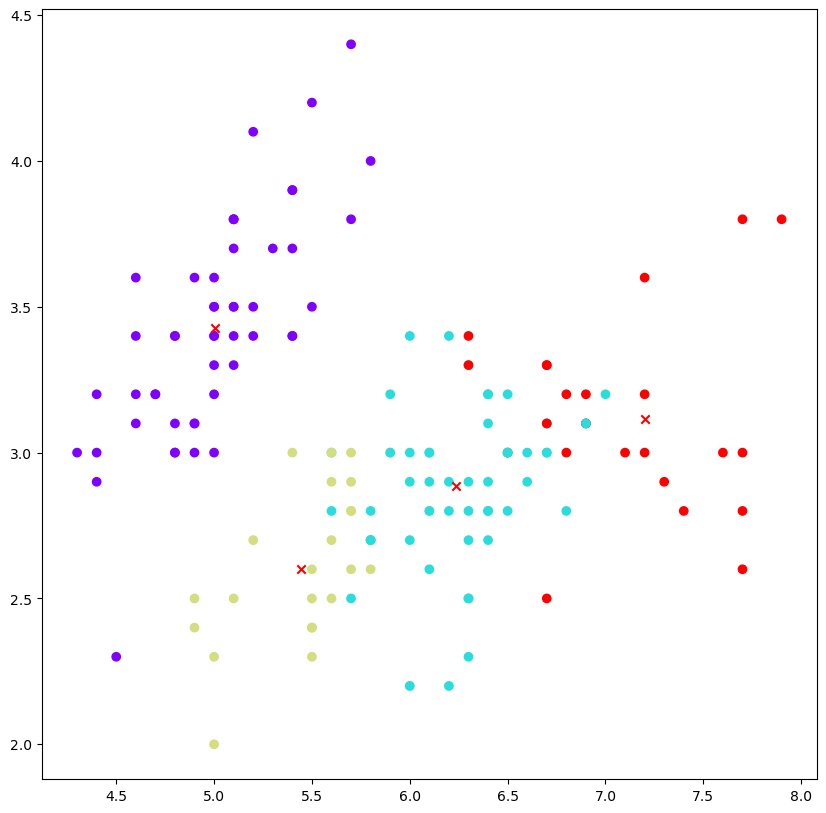

In [19]:
from sklearn.datasets import load_iris

dataset = load_iris().data

branching_factor = 50
threshold = 1.4
max_memory = 0.5 #MB

birch = BIRCH(branching_factor=branching_factor, threshold=threshold, max_memory_limit=max_memory)
birch.fit(dataset)

clusters = birch.get_clusters()
labels = birch.predict(dataset)

custom_birch_centroids = [np.mean(np.array(cf.data_points), axis=0) for cf in clusters]
custom_birch_centroids = np.array(custom_birch_centroids)

plt.figure(figsize=(10, 10))
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='rainbow')
plt.scatter(custom_birch_centroids[:, 0], custom_birch_centroids[:, 1], c='red', marker='x')

plt.show()


# Science Kit Learn comparison

Text(0.5, 0, 'Feature 1')

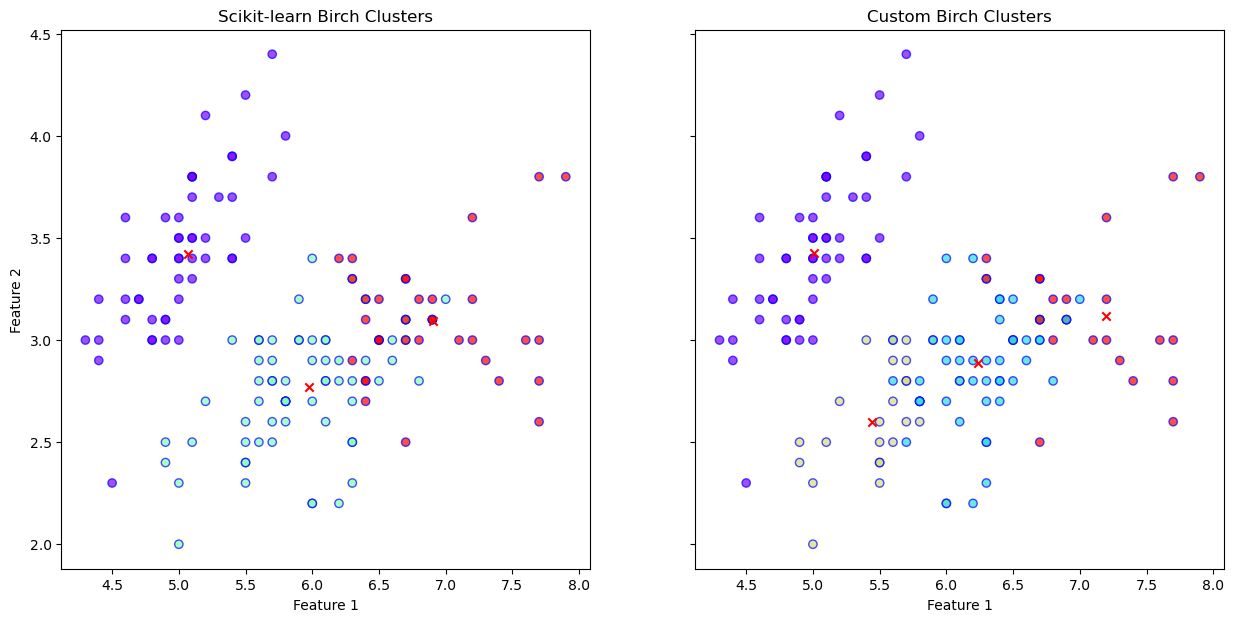

In [26]:
from sklearn.cluster import Birch

sklearn_birch = Birch(branching_factor=branching_factor, threshold=1, n_clusters=None)
sklearn_birch.fit(dataset)
pred = sklearn_birch.predict(dataset)

# Calculate centroids for custom BIRCH
custom_birch_centroids = [np.mean(np.array(cf.data_points), axis=0) for cf in clusters]
custom_birch_centroids = np.array(custom_birch_centroids) 

# Calculate centroids for scikit-learn Birch
sklearn_birch_centroids = sklearn_birch.subcluster_centers_

# Plotting for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

# Scikit-learn Birch clusters
axes[0].scatter(dataset[:, 0], dataset[:, 1], c=pred, cmap='rainbow', alpha=0.7, edgecolors='b')
axes[0].scatter(sklearn_birch_centroids[:, 0], sklearn_birch_centroids[:, 1], c='red', marker='x', label='Centroids')
axes[0].set_title('Scikit-learn Birch Clusters')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Custom Birch clusters
axes[1].scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
axes[1].scatter(custom_birch_centroids[:, 0], custom_birch_centroids[:, 1], c='red', marker='x')  # No label argument here
axes[1].set_title('Custom Birch Clusters')
axes[1].set_xlabel('Feature 1')